<a href="https://colab.research.google.com/github/aldiandarwin/prediksi-python/blob/main/pizza_steak_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

Read file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/linear regresion/pizza.csv')
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp155,000",14.0,smoked beef,NaN,reguler,yes,no


In [ ]:
df.shape

(136, 8)

check info

In [ ]:
# information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       136 non-null    object 
 1   price_rupiah  136 non-null    object 
 2   diameter      136 non-null    float64
 3   topping       135 non-null    object 
 4   variant       135 non-null    object 
 5   size          135 non-null    object 
 6   extra_sauce   131 non-null    object 
 7   extra_cheese  136 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.6+ KB


Check Missing Value

In [ ]:
# Check any missing value in dataset
df.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         1
variant         1
size            1
extra_sauce     5
extra_cheese    0
dtype: int64

Cleaning Missing Value

In [ ]:
# drop missing value di kolom 'topping , variant , size'
df = df.dropna(subset=['topping','variant','size'], inplace=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       134 non-null    object 
 1   price_rupiah  134 non-null    object 
 2   diameter      134 non-null    float64
 3   topping       134 non-null    object 
 4   variant       134 non-null    object 
 5   size          134 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  134 non-null    object 
dtypes: float64(1), object(7)
memory usage: 9.4+ KB
None


Step 2. Filling any missing values

5 rows in column 'Extra Sauce' still have missing values

In [ ]:
df[df.isna().any(axis=1)]

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
19,A,"Rp70,000",8.0,chicken,meat_lovers,reguler,NaN,yes
43,B,"Rp76,000",12.0,chicken,crunchy,medium,NaN,no
62,C,"Rp99,000",14.0,sausage,BBQ_sausage,large,NaN,yes
95,D,"Rp23,500",8.5,mozzarella,classic,small,NaN,no
135,E,"Rp78,000",12.0,meat,BBQ_meat_fiesta,medium,NaN,no


In [ ]:
df.groupby('extra_sauce').count()

,company,price_rupiah,diameter,topping,variant,size,extra_cheese
extra_sauce,,,,,,,
no,53,53,53,53,53,53,53
yes,76,76,76,76,76,76,76


In [ ]:
# mengisi missing values pada kolom 'extra sauce' dengan 'yes'
df['extra_sauce'] = df['extra_sauce'].fillna('yes')
df[df.isna().any(axis=1)]

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese


step 3. convert Data types

In [ ]:
df['price_rupiah'].sample(5)

99     Rp83,000
97     Rp72,000
22    Rp230,000
92    Rp149,000
76     Rp72,000
Name: price_rupiah, dtype: object

In [ ]:
# remove string & special character in price column & convert into 'int64'
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp','').str.replace(',','')
df['price_rupiah'] = pd.to_numeric(df['price_rupiah'])

In [ ]:
# Re-check the data type off price column is numeric
df['price_rupiah'].dtype

dtype('int64')

step 4. Check Unique Values

In [ ]:
df['topping'].unique()
#total 12 toppings

array(['chicken', 'papperoni', 'mushrooms', 'smoked beef', 'mozzarella',
       'black papper', 'tuna', 'meat', 'sausage', 'onion', 'vegetables',
       'beef'], dtype=object)

In [ ]:
df['variant'].unique()
# total 21 variants

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

EDA (Explanatory Data analysis)

statistic description

In [ ]:
df.describe()

,price_rupiah,diameter
count,134.000000,134.000000
mean,86485.074627,12.899254
std,44253.199209,3.265092
min,23500.000000,8.000000
25%,51750.000000,12.000000
50%,78000.000000,12.000000
75%,103500.000000,14.000000
max,248000.000000,22.000000


Histagram for price

<Axes: >

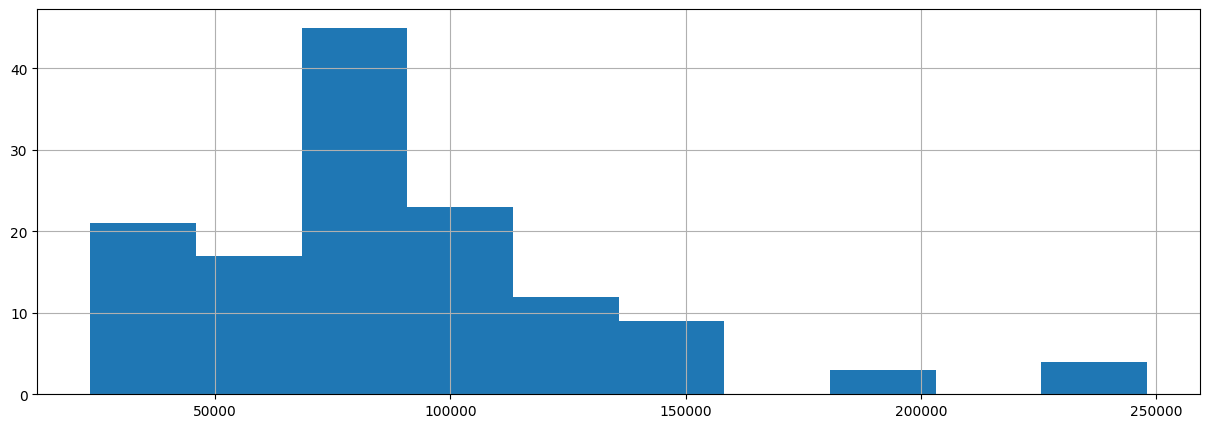

In [ ]:
plt.figure(figsize=(15,5))
df['price_rupiah'].hist()

Bar chart for diameter (counts)

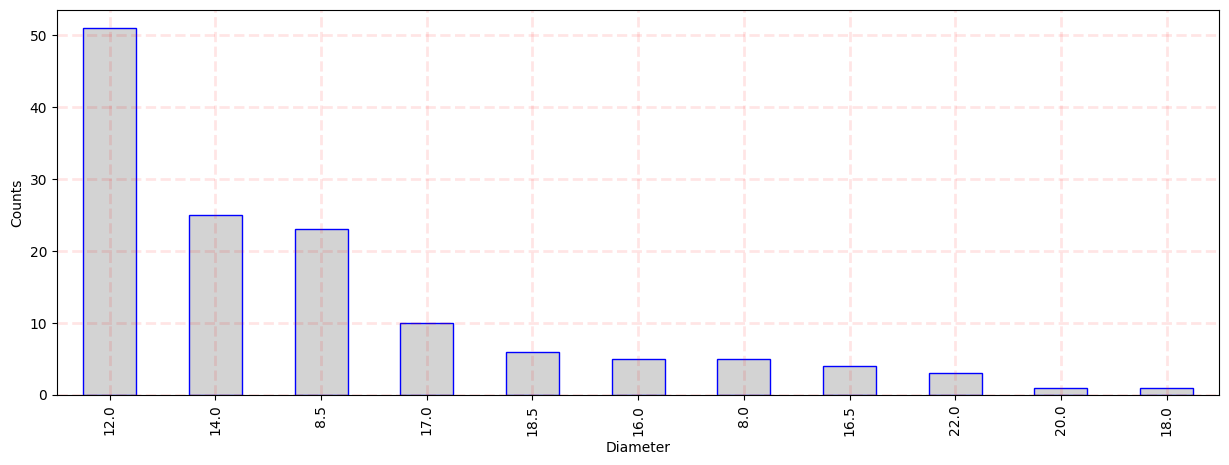

In [ ]:
plt.figure(figsize=(15,5))
df['diameter'].value_counts().plot.bar(color = 'lightgrey', edgecolor= 'blue')
plt.xlabel('Diameter')
plt.ylabel('Counts')
plt.grid(color = 'red', alpha = 0.1, linestyle = '--', linewidth = 2)
plt.show()

Scatter plot for diameter by price

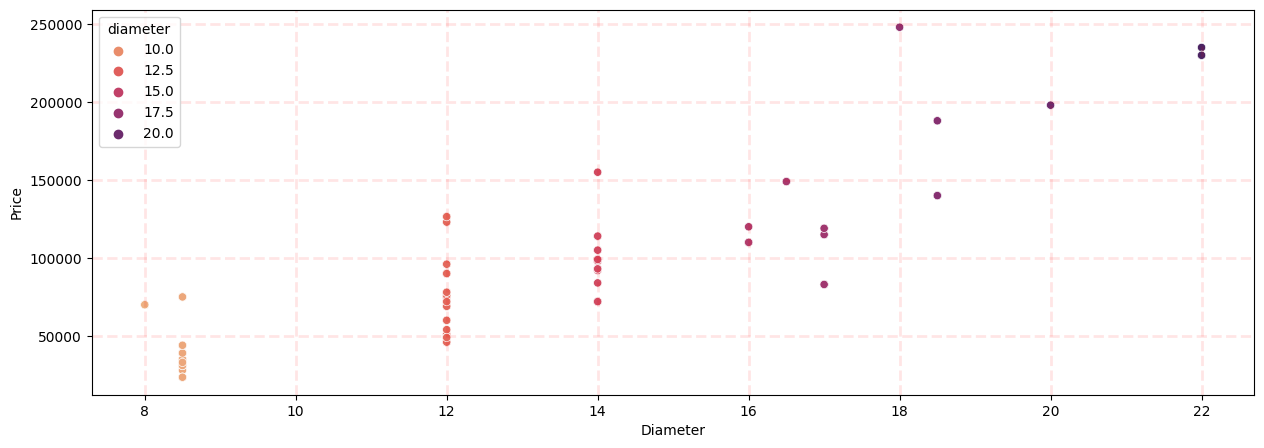

In [ ]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='diameter', y='price_rupiah', hue='diameter', palette='flare', data=df)
plt.xlabel('Diameter')
plt.ylabel('Price')
plt.grid(color='red', alpha=0.1, linestyle='--', linewidth=2)
plt.show()

Scatter plot for company by price

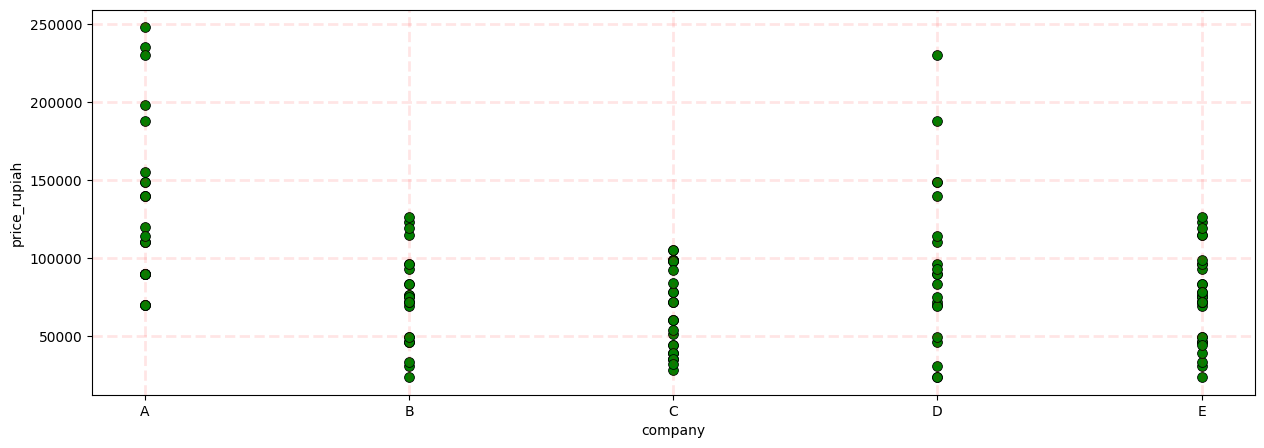

In [ ]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='company', y='price_rupiah', s=50, color='green', edgecolor='k', data=df)
plt.grid(color='red', alpha=0.1, linestyle='--', linewidth=2)
plt.show()

scatter plot for topping by price

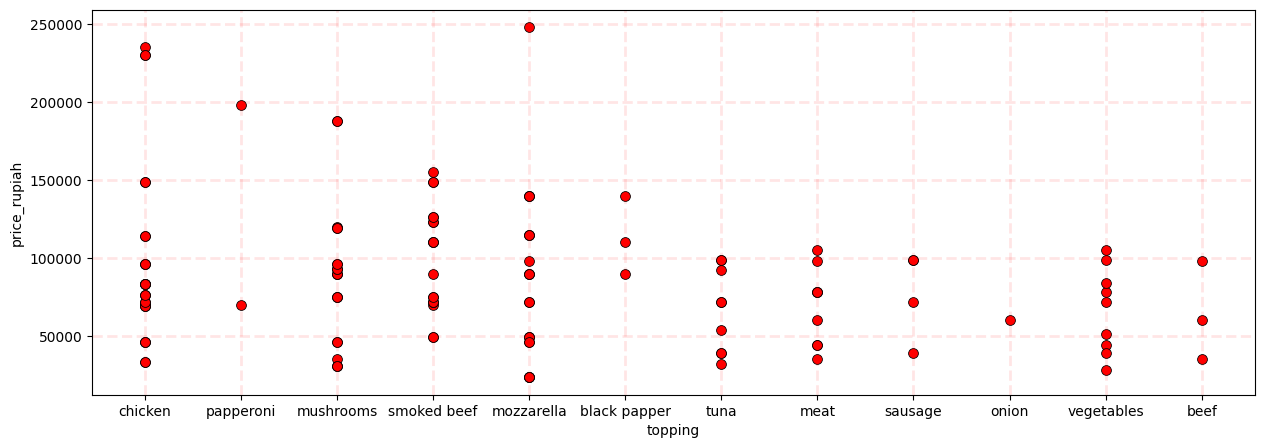

In [ ]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='topping', y='price_rupiah', s=50, color='red', edgecolor='k', data=df)
plt.grid(color='red', alpha=0.1, linestyle='--', linewidth=2)

In [ ]:
df.rename(columns={'price_rupiah': 'price'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       134 non-null    object 
 1   price         134 non-null    int64  
 2   diameter      134 non-null    float64
 3   topping       134 non-null    object 
 4   variant       134 non-null    object 
 5   size          134 non-null    object 
 6   extra_sauce   134 non-null    object 
 7   extra_cheese  134 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 9.4+ KB


Calculate mean price by each diameter

In [ ]:
mean_price = df['price'].groupby(df['diameter']).mean()
print(mean_price)

diameter
8.0      70000.000000
8.5      37217.391304
12.0     74725.490196
14.0     93640.000000
16.0    112000.000000
16.5    149000.000000
17.0     99800.000000
18.0    248000.000000
18.5    156000.000000
20.0    198000.000000
22.0    231666.666667
Name: price, dtype: float64


Feature engineering

In [ ]:
# encode label using SKlearn

EN = LabelEncoder()
df['company']=  EN.fit_transform(df['company']) # "A": 1, "B": 2, "C":3, "D": 4, "E":5
df['topping']=  EN.fit_transform(df['topping']) # "chicken": 1, "papperoni": 2, "mushroom": 3, "smoked beef": 4, "mozzarella": 5,dst...
df['variant']=  EN.fit_transform(df['variant']) # "double_signature": 1, "american_favorite": 2, "super_supreme": 3, "meat_lovers": 4 , dst..
df['size']=  EN.fit_transform(df['size']) # "small": 1, "regular": 2, "medium": 3, dst...
df['extra_sauce']=  EN.fit_transform(df['extra_sauce']) # "yes": 1, "no": 0
df['extra_cheese']=  EN.fit_transform(df['extra_sauce']) # "yes": 1, "no": 0

df.sample(10)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
105,4,115000,17.0,4,15,0,0,0
14,0,90000,12.0,1,18,4,0,0
118,4,33000,8.5,2,4,5,0,0
63,2,35000,8.5,5,9,5,1,1
86,3,70000,8.0,2,13,4,1,1
134,4,78000,12.0,3,0,3,0,0
31,1,83000,17.0,2,15,0,0,0
101,3,31000,8.5,5,4,5,1,1
80,2,98000,14.0,0,2,2,1,1
79,2,60000,12.0,0,2,3,1,1


In [ ]:
# Once again Check the dataset after the encoder process
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       134 non-null    int64  
 1   price         134 non-null    int64  
 2   diameter      134 non-null    float64
 3   topping       134 non-null    int64  
 4   variant       134 non-null    int64  
 5   size          134 non-null    int64  
 6   extra_sauce   134 non-null    int64  
 7   extra_cheese  134 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 9.4 KB


Corelation Heatmap

Split data

<ipython-input-75-a4dc4bfc78ba>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Correlation Heatmap')

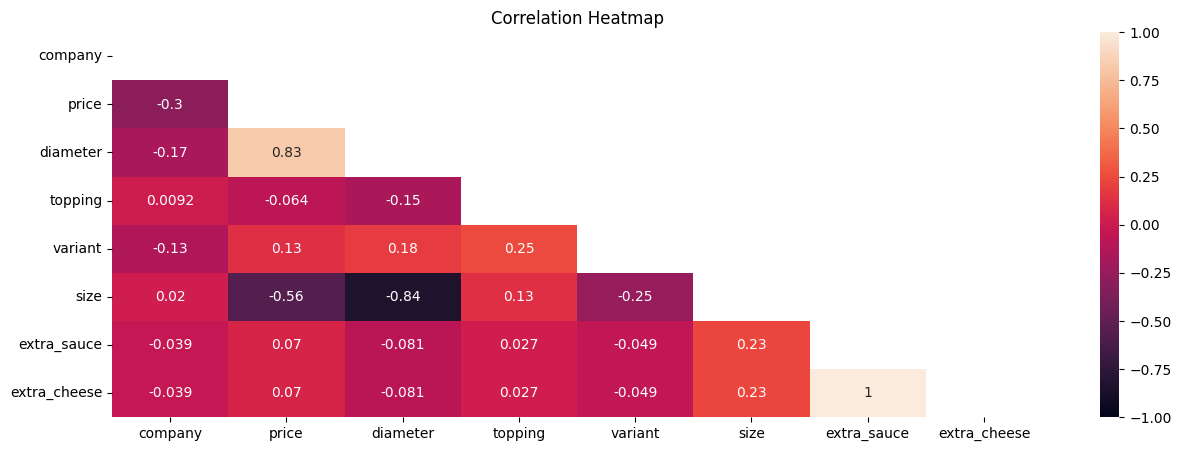

In [ ]:
plt.figure(figsize=(15,5))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot = True, mask = mask)

#menentukan format plot (judul)
heatmap.set_title('Correlation Heatmap')

In [ ]:
# split the data to train and test the model

x = df.drop(columns=['price'])
y = df['price']

Building model

In [ ]:
reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) #20% sebagai data test, dan 80% sebagai data training

print ('shape of X train : ', X_train.shape)
print ('shape of y train : ', y_train.shape)


print ('shape of X test : ', X_test.shape)
print ('shape of y test : ', y_test.shape)



shape of X train :  (107, 7)
shape of y train :  (107,)
shape of X test :  (27, 7)
shape of y test :  (27,)


In [ ]:
# fit the regressor to the training data
reg = reg.fit(X_train, y_train)
print(reg)

LinearRegression()


In [ ]:
# apply the regressor/model to the test data

y_pred = reg.predict(X_test)
print(y_pred)

[ 84725.2732919   29122.81363039  69223.35115045 100033.9007626
  68650.91597524  75431.94063513  39209.80326201  71376.55089859
  35740.33157965 120544.48311057  78670.32952404  33372.10596549
  41248.53420311  68351.56270544  68296.77510805 200002.40489558
 144588.69304887 108418.76253786 127162.00105982  50155.7928532
  87845.40798527  81349.07172316  76380.58882319  71266.28131028
  40846.04982586 120544.48311057  96837.51098565]


In [ ]:
y_pred = np.round_(y_pred, decimals = 2)
print ('Rounded-values : ', y_pred)

Rounded-values :  [ 84725.27  29122.81  69223.35 100033.9   68650.92  75431.94  39209.8
  71376.55  35740.33 120544.48  78670.33  33372.11  41248.53  68351.56
  68296.78 200002.4  144588.69 108418.76 127162.    50155.79  87845.41
  81349.07  76380.59  71266.28  40846.05 120544.48  96837.51]


Linear regresion formula

In [ ]:
print(reg.intercept_)

-124456.90825460995


In [ ]:
print(reg.coef_)

[-4041.90685757 14642.49911868   572.43517521   -68.27047635
  8882.86367229  2450.10621181  2450.10621181]


In [ ]:
# menampilkan hasil linear regresion ( koefision dari model)
coeff_df = pd.DataFrame(reg.coef_, x.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
company,-4041.906858
diameter,14642.499119
topping,572.435175
variant,-68.270476
size,8882.863672
extra_sauce,2450.106212
extra_cheese,2450.106212


In [ ]:
df_test_set = X_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED PRICE'] = y_pred
df_test_set.sample(5)

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price,PREDICTED PRICE
44,1,17.0,5,15,0,1,1,119000,127162.00
31,1,17.0,2,15,0,0,0,83000,120544.48
114,4,14.0,5,4,2,0,0,93000,84725.27
58,2,14.0,3,0,2,1,1,105000,96837.51
36,1,12.0,5,5,3,0,0,75000,76380.59


Scatter Plot actual price vs predicted price

Text(0, 0.5, 'Predicted Price')

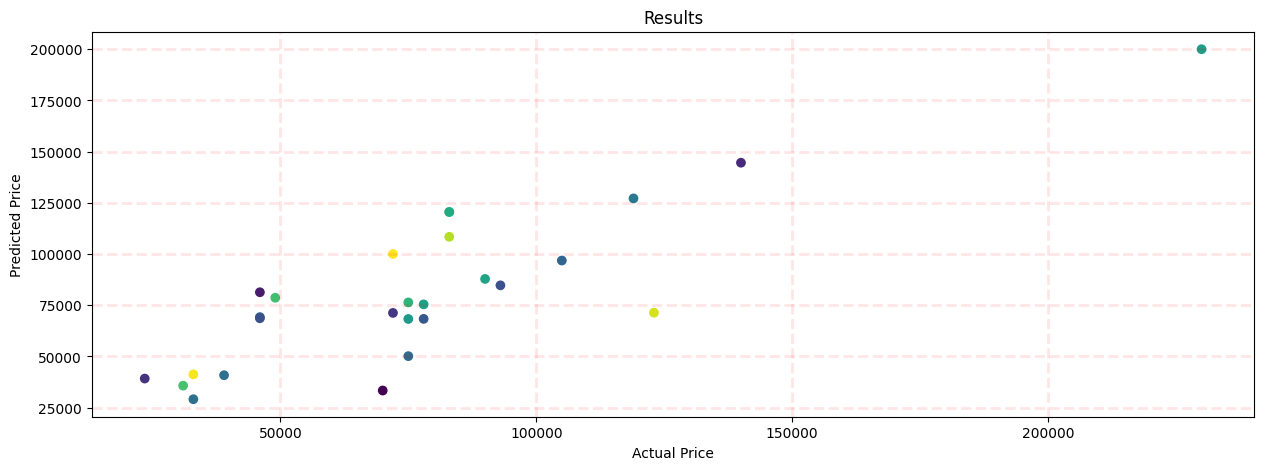

In [ ]:
plt.figure(figsize=(15,5))
colors = np.random.rand(27)
plt.scatter(y_test, y_pred, c = colors)
plt.grid(color = 'red', alpha = 0.1, linestyle = '--', linewidth = 2)
plt.title('Results')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

Scatter Plot actual price vs predicted price



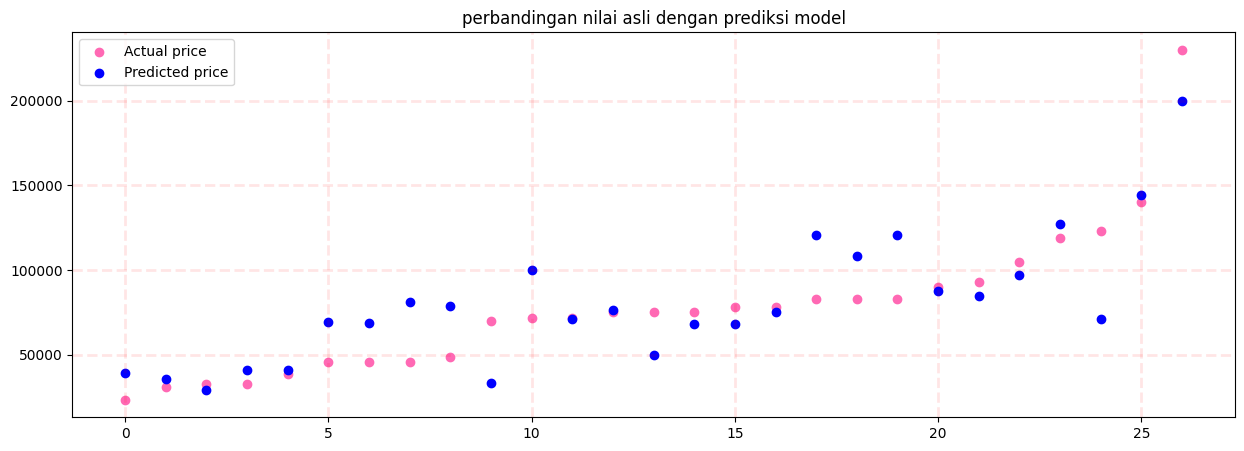

In [ ]:
plt.figure(figsize=(15,5))

# mengurutkan nilai asli dari terkecil hingga tertinggi
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

# merubah urutan prediction price berdasarkan urutan y_sorted
predictions_sorted = y_pred[y_sorted_index]

# plot kedua price
plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='Actual price', color = 'hotpink')
plt.scatter(np.arange(0,len(y_sorted)), prediction_sorted, label='Predicted price', color = 'blue')
plt.grid(color ='red', alpha = 0.1, linestyle = '--', linewidth = 2)
plt.title("perbandingan nilai asli dengan prediksi model")
plt.legend()

In [ ]:
# Save the product price amount value
output = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
output = output.sort_values(by = 'Actual Price')

In [ ]:
output

,Actual Price,Predicted Price
95,23500,39209.80
112,31000,35740.33
118,33000,29122.81
39,33000,41248.53
59,39000,40846.05
125,46000,69223.35
119,46000,68650.92
47,46000,81349.07
49,49000,78670.33
19,70000,33372.11


In [ ]:
# explained variance score : 1 is perfect prediction
# and 0 means that there is no linear relationship beetween x and y.

print('Training model : ', reg.score(X_train, y_train))
print ('Testing model : ', reg.score(X_test, y_test))

Training model :  0.7681091494998541
Testing model :  0.7065590568392655


In [ ]:
from sklearn import metrics

print ('R2 scroe : ', metrics.r2_score(y_test, y_pred))

R2 scroe :  0.706559067928305


In [ ]:
output.to_csv('/content/drive/MyDrive/linear regresion/pizza price pred.csv', index= False)